In [1]:
# Modules will be reloaded every time a cell is executed
%load_ext autoreload
%autoreload 2

### Model training

In [2]:
EXPERIMENT_NAME = 'cnn_att'
DATASET_NAME = 'mirna_fcs'
# DATA_FOLDER = 'data/'
DATA_FOLDER = 'data/3utr/processed/'
# MIRNA_NAMES = ['hsa-miR-106b-5p', 'hsa-let-7c-5p', 'hsa-miR-16-5p']
MIRNA_NAMES = ['hsa-let-7c-5p']

RANDOM_STATE = 42
BATCH_SIZE = 32

In [3]:
from pytorch_lightning.loggers import CometLogger

comet_logger = CometLogger(
    api_key="EpKIINrla6U4B4LJhd9Sv4i0b",
    project_name="mirna",
)

CometLogger will be initialized in online mode


In [4]:
import pandas as pd
data = pd.read_pickle('data/3utr.sequences.refseq_id.mirna_fc.pkl')

In [5]:
miRNA_columns = ['hsa-miR-16-5p', 'hsa-miR-106b-5p',
                 'hsa-miR-200a-3p', 'hsa-miR-200b-3p', 'hsa-miR-215-5p',
                 'hsa-let-7c-5p', 'hsa-miR-103a-3p']

df_melted = pd.melt(data[miRNA_columns], var_name='miRNA', value_name='fold_change')

In [6]:
df_melted.fold_change[df_melted.fold_change > 0] = 0

/tmp/ipykernel_1910/1296380808.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_melted.fold_change[df_melted.fold_change > 0] = 0


In [7]:
for mirna_column in miRNA_columns:
    data[mirna_column][data[mirna_column] > 0] = 0

/tmp/ipykernel_1910/3718702857.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[mirna_column][data[mirna_column] > 0] = 0
/tmp/ipykernel_1910/3718702857.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[mirna_column][data[mirna_column] > 0] = 0
/tmp/ipykernel_1910/3718702857.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[mirna_column][data[mirna_column] > 0] = 0
/tmp/ipykernel_1910/3718702857.py:2: SettingWithC

In [8]:
data_described = data[miRNA_columns].describe()
data_described.loc['count'] = data_described.loc['count'].astype(int).astype(str)
data_described

,hsa-miR-16-5p,hsa-miR-106b-5p,hsa-miR-200a-3p,hsa-miR-200b-3p,hsa-miR-215-5p,hsa-let-7c-5p,hsa-miR-103a-3p
count,7915,7902,7934,7966,7976,8002,7489
mean,-0.072002,-0.056404,-0.075153,-0.076791,-0.089344,-0.062591,-0.068743
std,0.121716,0.10897,0.143666,0.138563,0.164438,0.119031,0.152078
min,-1.297,-1.255,-1.82,-1.372,-1.477,-1.334,-1.498
25%,-0.104,-0.07,-0.098,-0.105,-0.122,-0.079,-0.072
50%,-0.004,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0


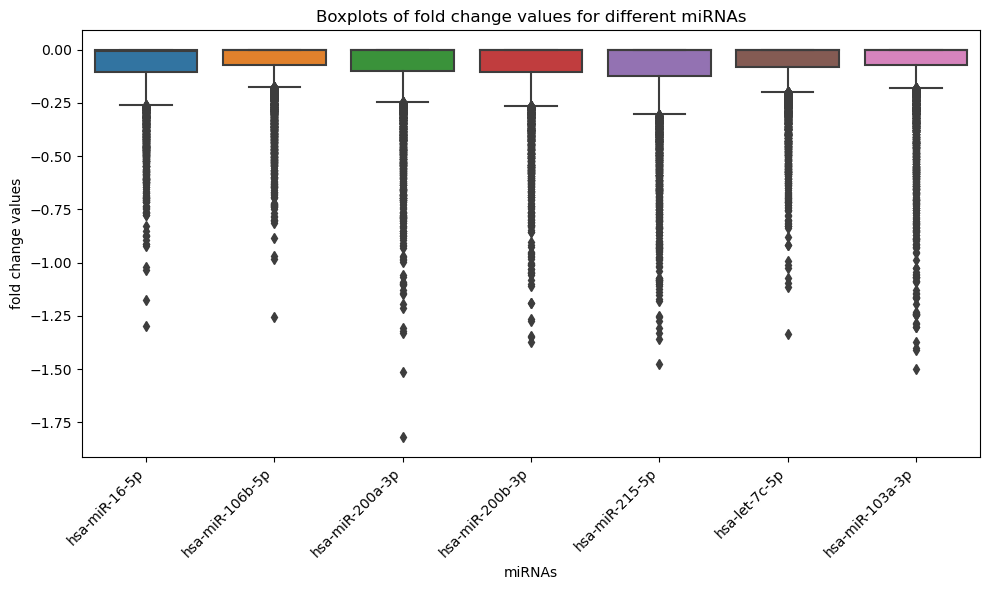

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting as multiple boxplots on one graph using Seaborn
plt.figure(figsize=(10, 6))

# Create boxplots using Seaborn
sns.boxplot(x='miRNA', y='fold_change', data=df_melted)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels

# Add labels and title
plt.xlabel('miRNAs')
plt.ylabel('fold change values')
plt.title('Boxplots of fold change values for different miRNAs')

# Show the plot
plt.tight_layout()
plt.savefig('Boxplots of fold change values for different miRNAs.png')
plt.show()


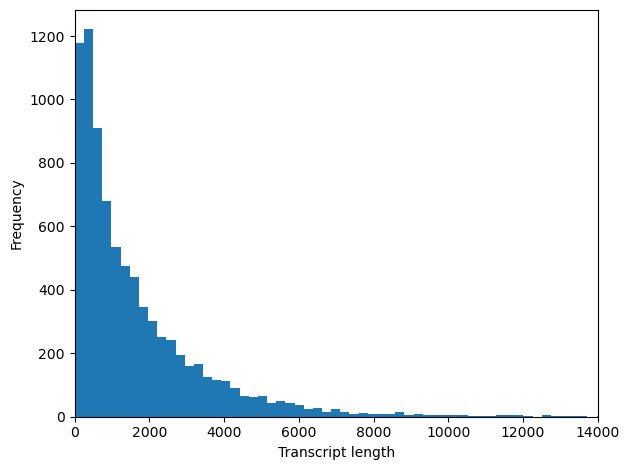

In [41]:
data.sequence.str.len().plot(
    kind='hist', 
    bins=100, 
    xlim=(0,14000),
    xlabel='Transcript length',
)
plt.tight_layout()
plt.savefig('transcript length histogram.png')
plt.show()

In [11]:
import pandas as pd
from utils import get_train_and_test_set

df_train, df_test = get_train_and_test_set(
    DATA_FOLDER,
    DATASET_NAME, 
    MIRNA_NAMES, 
    file_extension_train='.train.positive_fc_to_zero.signals.compressed_zeros.remove_genes_without_signal.zero_signal_to_negative.normalize.pkl',
    # 'data/3utr/processed/mirna_fcs.hsa-let-7c-5p.train.positive_fc_to_zero.signals.compressed_zeros.remove_genes_without_signal.zero_signal_to_negative.normalize.pkl'
    file_extension_test='.test.positive_fc_to_zero.signals.compressed_zeros.predict_genes_without_signal.zero_signal_to_negative.normalize.fill_empty_signal.pkl',
    # 'data/3utr/processed/mirna_fcs.hsa-let-7c-5p.test.positive_fc_to_zero.signals.compressed_zeros.predict_genes_without_signal.zero_signal_to_negative.normalize.fill_empty_signal.pkl'
)

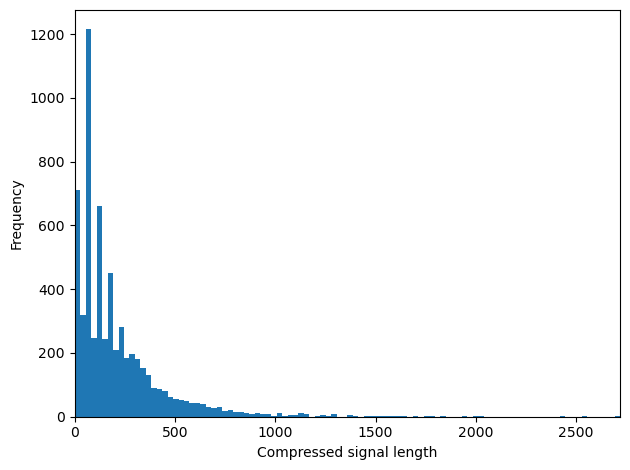

In [50]:
pd.concat(
    [df_train, df_test], 
    ignore_index=True,
).signal.str.len().plot(
    kind='hist', 
    bins=100, 
    xlim=(0,2719),
    xlabel='Compressed signal length',
)
plt.tight_layout()
plt.savefig('Compressed signal length')
plt.show()

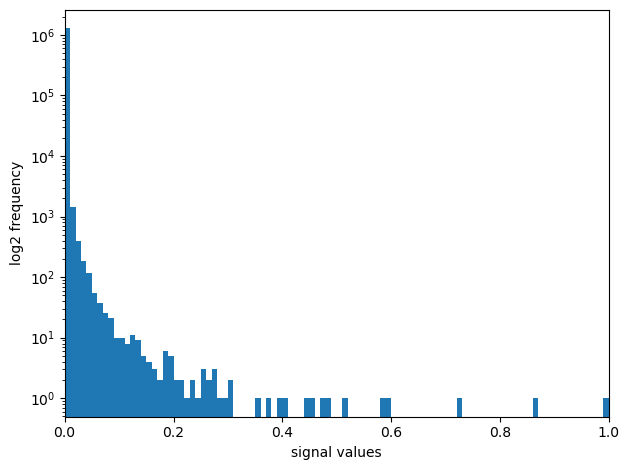

In [81]:
# pd.set_option('float_format', '{:f}'.format)
# pd.reset_option('^display.', silent=True)

pd.concat(
    [df_train, df_test], 
    ignore_index=True,
).signal.explode().plot(
    kind='hist', 
    bins=100, 
    xlim=(0,1),
    # ylim=(0,2000),
    xlabel='signal values',
    ylabel='log2 frequency',
    log=True,
)
plt.tight_layout()
plt.savefig('signal values vs log2 frequency')
plt.show()

In [83]:
from utils import pad_2d_array_to_longest_subarray_length
#max_len = None
max_len = max(
    max(len(sublist) for sublist in df_train['signal']),
    max(len(sublist) for sublist in df_test['signal']),
)

df_train['signal'] = pad_2d_array_to_longest_subarray_length(df_train['signal'], pad_to_length=max_len)
df_test['signal'] = pad_2d_array_to_longest_subarray_length(df_test['signal'], pad_to_length=max_len)

In [84]:
len(max(df_train['signal'])), len(max(df_test['signal']))

(2719, 2719)

In [18]:
df_train.shape[0], df_test.shape[0]

(4046, 2050)

In [10]:
from sklearn.model_selection import train_test_split

#split validation set
df_train, df_val = train_test_split(
    df_train, 
    test_size = 0.2, 
    random_state = RANDOM_STATE,
    shuffle=True
)

In [11]:
print(
    df_train['gene_symbol'].size, 
    df_test['gene_symbol'].size,
    df_val['gene_symbol'].size,
)

9054 6101 2264


In [23]:
from dataset import get_train_dataloader, get_val_dataloader, get_test_dataloader
import torch

train_loader = get_train_dataloader([torch.tensor(x) for x in df_train['signal']], df_train['fold_change'].values, BATCH_SIZE)
val_loader = get_val_dataloader([torch.tensor(x) for x in df_val['signal']], df_val['fold_change'].values, BATCH_SIZE)
test_loader = get_test_dataloader([torch.tensor(x) for x in df_test['signal']], df_test['fold_change'].values, BATCH_SIZE)

### New experiment training 

In [24]:
from utils import make_dir_with_parents, get_experiment_time_id

experiment_id = get_experiment_time_id(sufix=EXPERIMENT_NAME)
RESULT_DIR = "results/{}/".format(experiment_id)

make_dir_with_parents(RESULT_DIR)

PosixPath('results/16-11-23_13-47.cnn_att')

In [27]:
from pytorch_lightning import Trainer
from IPython.utils import io
from pytorch_lightning.callbacks import EarlyStopping, ModelCheckpoint

from model import Small_CNN


comet_logger.reset_experiment()

model_params = {
    # 'pooling':'att',
    # 'pooling':'max',
    'pooling':'rnn',
    # 'lr':1e-5,
    'lr':1e-4,
    # 'lr':1e-3,
    'warmup_steps':10,
    'wd':0.01,
    'logging_steps':1,
    'pos_weight':1.0,
    # 'num_cnn_layers':3,
    'num_cnn_layers':4,
    # 'num_cnn_layers':5,
    # 'max_epochs':50,
    # 'max_epochs':60,
    # 'max_epochs':70,
    # 'max_epochs':80,
    'max_epochs':14,
    # 'max_epochs':120,
    # 'max_epochs':140,
    'monitor':'valid mse',
    # 'monitor':'valid_loss',
}

# logger.log_hyperparams({"batch_size": 32, "learning_rate": 0.001})
model = Small_CNN(
    **model_params,
    # pooling = model_params['pooling'],
    # lr = model_params['lr'],
    # warmup_steps = model_params['warmup_steps'],
    # wd = model_params['wd'],
    # logging_steps = model_params['logging_steps'],
    # pos_weight = model_params['pos_weight'],
    # num_cnn_layers = model_params['num_cnn_layers'],
)

checkpoint_callback = ModelCheckpoint(
    monitor=model_params['monitor'],
    dirpath=RESULT_DIR + 'checkpoints',
    filename='epoch{epoch:02d}-val_loss{val/loss:.2f}',
    auto_insert_metric_name=False,
    save_top_k=3,
    mode="min",
)        

# trainer = Trainer(max_epochs=1, gpus=1)  # Use GPU if available
trainer = Trainer(
    logger=comet_logger, 
    max_epochs=model_params['max_epochs'],
    callbacks=[
        checkpoint_callback,
        # EarlyStopping(
        #     monitor="valid_loss", 
        #     min_delta=0.00, 
        #     patience=5,
        #     verbose=True, 
        #     mode="min"
        # ),
        
    ],
)  

# capture_output to have a cleaner notebook
# you can follow the training at the  https://www.comet.com/davidcechak/mirna/  see log of this cell
with io.capture_output() as captured:
    trainer.fit(model, train_loader, val_loader)


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name         | Type              | Params
---------------------------------------------------
0 | architecture | Sequential        | 56.6 K
1 | ce           | MSELoss           | 0     
2 | mae          | MeanAbsoluteError | 0     
3 | mse          | MeanSquaredError  | 0     
4 | r2           | R2Score           | 0     
---------------------------------------------------
56.6 K    Trainable params
0         Non-trainable params
56.6 K    Total params
0.226     Total estimated model params size (MB)
COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: torch, sklearn.
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET WARNING: You are trying to log string value as a

In [28]:
comet_logger.finalize(status=None)

### Model prediction

In [29]:
CHECKPOINT_PATH = checkpoint_callback.best_model_path
checkpoint = torch.load(CHECKPOINT_PATH)
print(checkpoint['epoch'])

model_best_checkpoint = model.load_from_checkpoint(
    CHECKPOINT_PATH,
    **model_params,
)

6


#### train set -- sanity check 

In [30]:
# results = pd.read_pickle("results/16-11-23_12-04.cnn_att/mirna_fcs.['hsa-miR-106b-5p', 'hsa-let-7c-5p', 'hsa-miR-16-5p'].test.positive_fc_to_zero.signals.compressed_zeros.predict_genes_without_signal.zero_signal_to_negative.normalize.fill_empty_signal.16-11-23_12-04.cnn_att.pkl")

In [31]:
from dataset import predict

gene_to_predictions_train, predictions_train = predict(model_best_checkpoint, [torch.tensor(x) for x in df_train['signal']], df_train['gene_symbol'].values)

In [32]:
df_predictions = pd.DataFrame(gene_to_predictions_train.items(), columns=['gene_symbol' ,'prediction'])
method_predictions_train = pd.merge(df_train, df_predictions, on='gene_symbol', how='left')

In [33]:
corr_train = method_predictions_train[['fold_change', 'prediction']].corr()
corr_train

,fold_change,prediction
fold_change,1.000000,0.103003
prediction,0.103003,1.000000


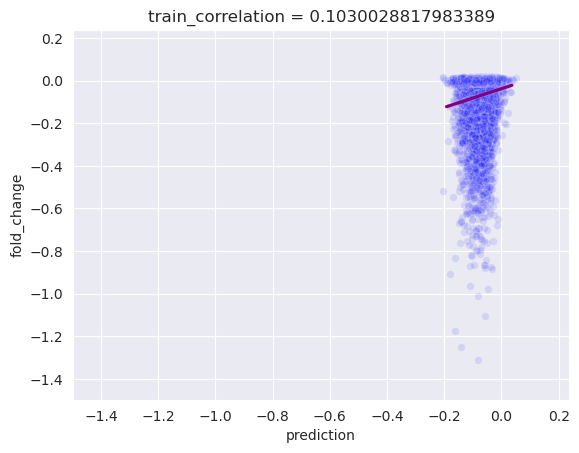

In [34]:
from plots import draw_corr_plot

draw_corr_plot(
    data=method_predictions_train[['fold_change', 'prediction']],
    x="prediction",
    y="fold_change",
    title = "train_correlation = {}".format(corr_train['prediction'][0]),
    output_path = "{}/corr_train.jpg".format(RESULT_DIR),
)

#### test set

In [35]:
from dataset import predict

gene_to_predictions_test, predictions = predict(model_best_checkpoint, [torch.tensor(x) for x in df_test['signal']], df_test['gene_symbol'].values)

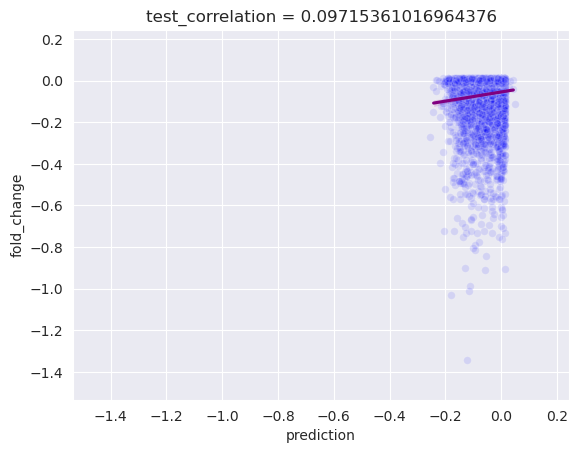

In [36]:
from plots import draw_corr_plot
from data_manipulation import add_predictions_to_test_dataframe


method_predictions_test, results_file_path = add_predictions_to_test_dataframe(
    df_test,
    gene_to_predictions_test,
    output_file_path = '{}/{}.{}.test.positive_fc_to_zero.signals.compressed_zeros.predict_genes_without_signal.zero_signal_to_negative.normalize.fill_empty_signal.{}.pkl'.format(
        RESULT_DIR,
        DATASET_NAME,
        MIRNA_NAMES,
        experiment_id,
    )
)

corr_test = method_predictions_test[['fold_change', 'prediction']].corr()

draw_corr_plot(
    data=method_predictions_test[['fold_change', 'prediction']],
    x="prediction",
    y="fold_change",
    title = "test_correlation = {}".format(corr_test['prediction'][0]),  
    output_path = "{}/corr_test.jpg".format(RESULT_DIR),
)

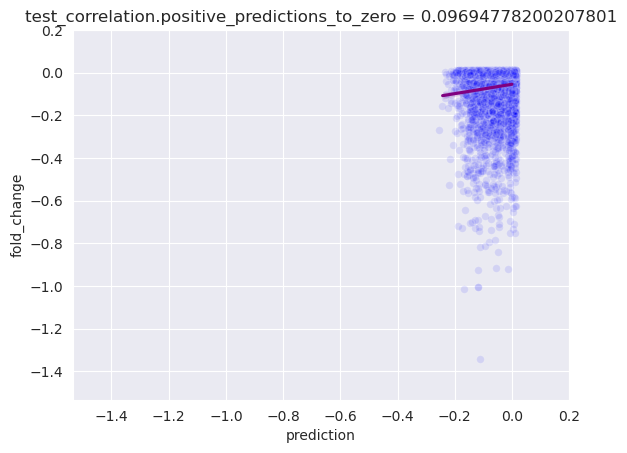

In [37]:
from plots import draw_corr_plot
from data_manipulation import add_predictions_to_test_dataframe


method_predictions_test, results_file_path = add_predictions_to_test_dataframe(
    df_test,
    gene_to_predictions_test,
    output_file_path = '{}/{}.{}.test.positive_fc_to_zero.signals.compressed_zeros.predict_genes_without_signal.zero_signal_to_negative.normalize.fill_empty_signal.{}.pkl'.format(
        RESULT_DIR,
        DATASET_NAME,
        MIRNA_NAMES,
        experiment_id,
    )
)

preds_test_positives_to_zero = method_predictions_test.copy()
preds_test_positives_to_zero.loc[preds_test_positives_to_zero.prediction > 0, 'prediction'] = 0
corr_test = preds_test_positives_to_zero[['fold_change', 'prediction']].corr()

draw_corr_plot(
    data=preds_test_positives_to_zero[['fold_change', 'prediction']],
    x="prediction",
    y="fold_change",
    title = "test_correlation.positive_predictions_to_zero = {}".format(corr_test['prediction'][0]),  
    output_path = "{}/corr_test.positive_predictions_to_zero.jpg".format(RESULT_DIR),
)

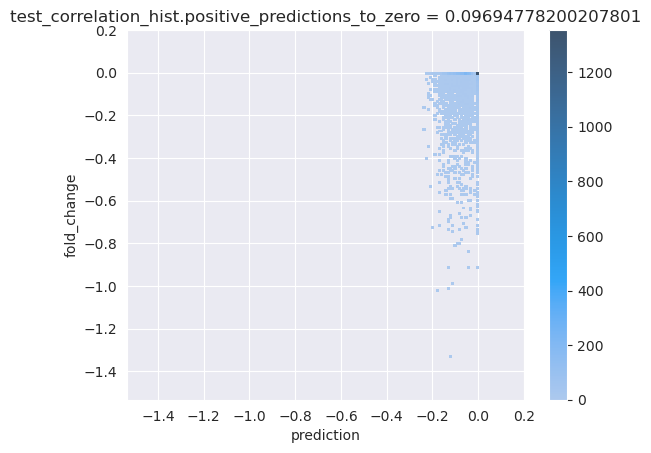

In [38]:
from plots import draw_corr_hist
    
draw_corr_hist(
    data=preds_test_positives_to_zero[['fold_change', 'prediction']],
    x="prediction",
    y="fold_change",
    title = "test_correlation_hist.positive_predictions_to_zero = {}".format(corr_test['prediction'][0]),  
    output_path = "{}/corr_test_hist.positive_predictions_to_zero.jpg".format(RESULT_DIR),
)

In [39]:
# sns.jointplot(
#     # data=preds_test_positives_to_zero[['fold_change', 'prediction']],
#     x = preds_test_positives_to_zero['fold_change'].to_numpy(),
#     y = preds_test_positives_to_zero['prediction'].to_numpy(),
#     # x='fold_change',
#     # y='prediction', 
#     # x=preds_test_positives_to_zero['fold_change'].values,
#     # y=preds_test_positives_to_zero['prediction'].values, 
#     kind="reg"
# )

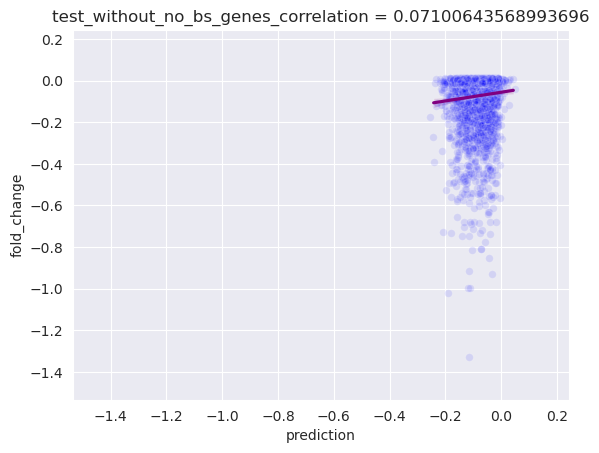

In [40]:
from utils import check_empty_or_not_array

method_predictions_without_no_bs_genes = df_test.copy()
method_predictions_without_no_bs_genes = method_predictions_without_no_bs_genes.drop(
    method_predictions_without_no_bs_genes[method_predictions_without_no_bs_genes.prediction == 0].index, 
    axis=0,
)
method_predictions_without_no_bs_genes = method_predictions_without_no_bs_genes[['gene_symbol', 'fold_change', 'mirna', 'signal']].merge(
    method_predictions_test[['gene_symbol','mirna', 'prediction']], 
    on=['gene_symbol','mirna'],
    how='left'
)

corr_test_without_no_bs_genes = method_predictions_without_no_bs_genes[['fold_change', 'prediction']].corr()

draw_corr_plot(
    data=method_predictions_without_no_bs_genes[['fold_change', 'prediction']],
    x="prediction",
    y="fold_change",
    title = "test_without_no_bs_genes_correlation = {}".format(corr_test_without_no_bs_genes['prediction'][0]),  
    output_path = "{}/corr_test_without_no_bs_genes.jpg".format(RESULT_DIR),
)

#### save model summary

In [41]:
total_params = sum(p.numel() for p in model_best_checkpoint.parameters() if p.requires_grad)

with open("{}/model{}.txt".format(RESULT_DIR, experiment_id), "w") as text_file:
    print(model_best_checkpoint, file=text_file)
    print("model_params: ", model_params, file=text_file)
    print(total_params, file=text_file)

#### Bartel on test set

In [42]:
mirna_name = 'hsa-miR-106b-5p'
targetscan = pd.read_csv('Predicted_Targets_Context_Scores.default_predictions.txt',index_col=0, header=0, sep='\t')
targetscan = targetscan[["context++ score", "weighted context++ score","miRNA","Gene Symbol"]]
# targetscan = targetscan[targetscan['miRNA'] == mirna_name]
targetscan = targetscan.rename(columns={"Gene Symbol": "gene_symbol", "miRNA":"mirna"})

bartel_on_test_set = pd.merge(
    preds_test_positives_to_zero, 
    targetscan[['gene_symbol', "weighted context++ score", "context++ score", 'mirna']], 
    on=['gene_symbol', 'mirna'], 
    how='left'
)

In [43]:
# mirna_name = 'hsa-miR-106b-5p'
# targetscan = pd.read_csv('Predicted_Targets_Context_Scores.default_predictions.txt',index_col=0, header=0, sep='\t')
# targetscan = targetscan[["context++ score", "weighted context++ score","miRNA","Gene Symbol"]]
# targetscan = targetscan[targetscan['miRNA'] == mirna_name]
# targetscan = targetscan.rename(columns={"Gene Symbol": "gene_symbol"})
# bartel_on_test_set = pd.merge(df_test, targetscan[['gene_symbol', "weighted context++ score", "context++ score"]], on='gene_symbol', how='left')

In [44]:
bartel_on_test_set['weighted context++ score'] = bartel_on_test_set['weighted context++ score'].fillna(0)

In [45]:
bartel_on_test_set_corr = bartel_on_test_set[
    ['context++ score', 'weighted context++ score', 'fold_change', 'prediction']
].corr()
bartel_on_test_set_corr.to_csv("{}/bartel_on_test_set_corr.csv".format(RESULT_DIR))
bartel_on_test_set_corr

,context++ score,weighted context++ score,fold_change,prediction
context++ score,1.000000,0.775079,0.281911,-0.158992
weighted context++ score,0.775079,1.000000,0.342400,0.111023
fold_change,0.281911,0.342400,1.000000,0.108598
prediction,-0.158992,0.111023,0.108598,1.000000


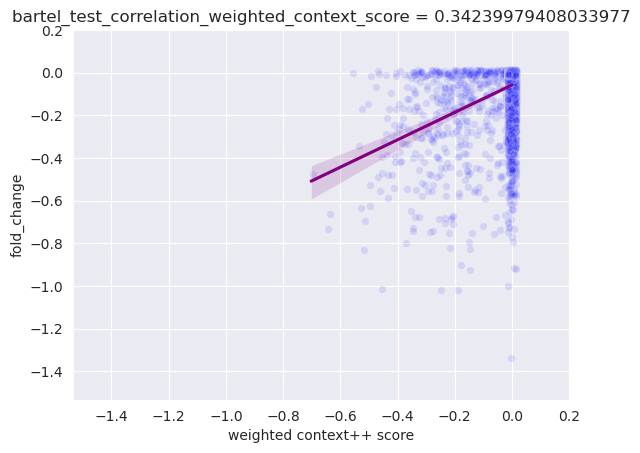

In [46]:
draw_corr_plot(
    data=bartel_on_test_set[['weighted context++ score', 'fold_change']],
    x="weighted context++ score",
    y="fold_change",
    title = "bartel_test_correlation_weighted_context_score = {}".format(bartel_on_test_set_corr['fold_change'][1]),  
    output_path = "{}/bartel_test_correlation_weighted_context_score.jpg".format(RESULT_DIR),
)

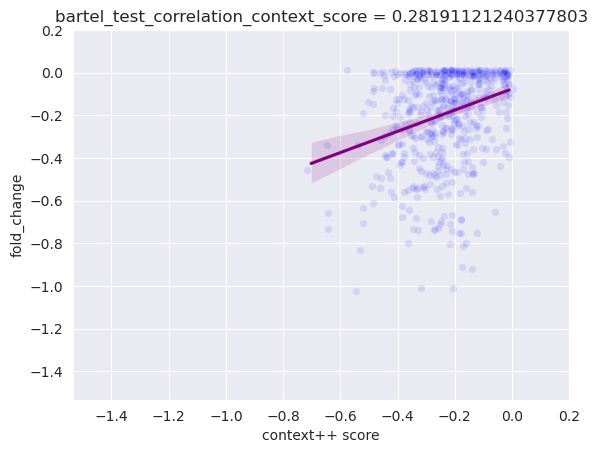

In [47]:
draw_corr_plot(
    data=bartel_on_test_set[['context++ score', 'fold_change']],
    x="context++ score",
    y="fold_change",
    title = "bartel_test_correlation_context_score = {}".format(bartel_on_test_set_corr['fold_change'][0]),  
    output_path = "{}/bartel_test_correlation_context_score.jpg".format(RESULT_DIR),
)

In [48]:
bartel_on_test_set[bartel_on_test_set['fold_change'] > -0.01].size

23667

In [49]:
bartel_on_test_set[['weighted context++ score', 'prediction']].corr()['prediction'][0]

0.11102347556881566

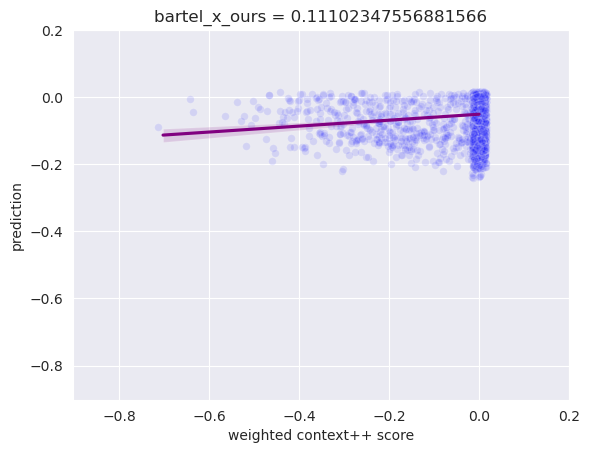

In [50]:
draw_corr_plot(
    data=bartel_on_test_set[['weighted context++ score', 'prediction']],
    x="weighted context++ score",
    y="prediction",
    title = "bartel_x_ours = {}".format(
        bartel_on_test_set[['weighted context++ score', 'prediction']].corr()['prediction'][0]
    ),  
    output_path = "{}/bartel_x_ours.jpg".format(RESULT_DIR),
)

In [51]:
fc_zeroes = bartel_on_test_set[bartel_on_test_set['fold_change'] > -0.01]

In [52]:
fc_zeroes.size

23667

In [53]:
fc_zeroes[fc_zeroes['weighted context++ score'] > -0.01].size

22554

In [54]:
our_hit_zeroes = fc_zeroes[fc_zeroes['prediction'] > -0.01]
our_hit_zeroes.size

9492

In [55]:
our_hit_zeroes.signal.map(lambda x: sum(x) > 0).value_counts()

signal
False    1325
True       31
Name: count, dtype: int64

In [56]:
fc_zeroes[fc_zeroes['prediction'] < -0.1].size

4571

In [57]:
our_missed_zeroes = fc_zeroes[fc_zeroes['prediction'] < -0.01]
our_missed_zeroes.size

14175

In [58]:
bartel_on_test_set['prod'] = bartel_on_test_set['prediction'] * bartel_on_test_set['weighted context++ score']

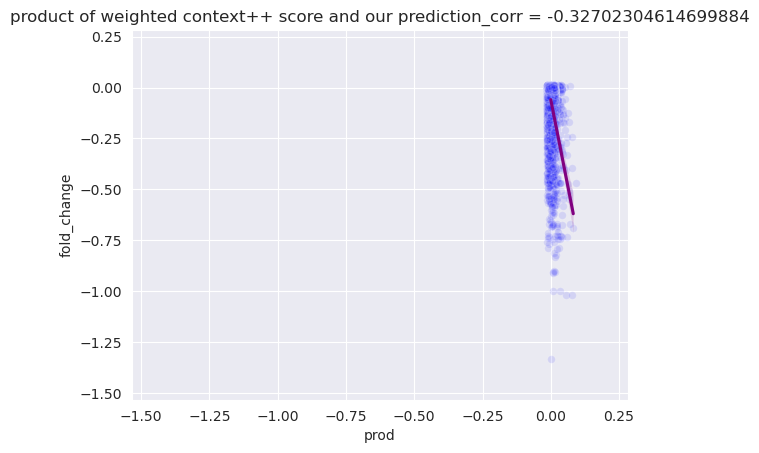

In [59]:
draw_corr_plot(
    data=bartel_on_test_set[['fold_change','prod']],
    x="prod",
    y="fold_change",
    title = "product of weighted context++ score and our prediction_corr = {}".format(bartel_on_test_set[['fold_change','prod']].corr()['prod'][0]),  
    output_path = "{}/product of weighted context++ score and our prediction_corr.jpg".format(RESULT_DIR),
)

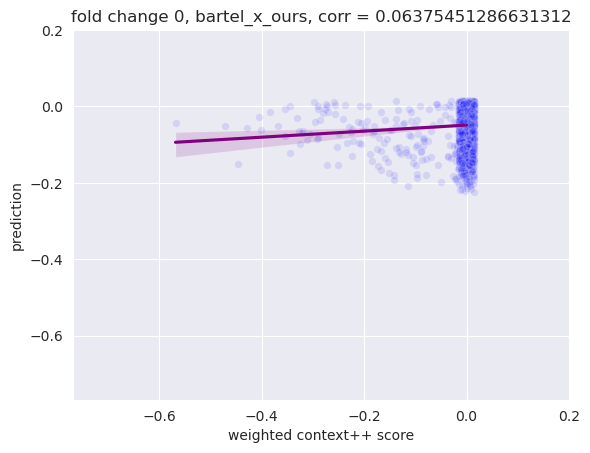

In [60]:
draw_corr_plot(
    data=fc_zeroes[['weighted context++ score', 'prediction']],
    x="weighted context++ score",
    y="prediction",
    title = "fold change 0, bartel_x_ours, corr = {}".format(
        fc_zeroes[['weighted context++ score', 'prediction']].corr()['prediction'][0]
    ),  
    output_path = "{}/fc_zero.bartel_x_ours.corr.jpg".format(RESULT_DIR),
)

In [61]:
CLASS_THRESHOLD = -0.2
bartel_on_test_set['class'] = bartel_on_test_set['fold_change'] < CLASS_THRESHOLD

In [62]:
bartel_on_test_set.size

55827

In [63]:
#sklearn.metrics.precision_recall_curve(y_true, probas_pred, *, pos_label=None, sample_weight=None, drop_intermediate=False)[source]¶
from sklearn.metrics import precision_recall_curve
precision_recall_curve(bartel_on_test_set['class'], -1 * bartel_on_test_set['prediction'])

(array([0.10768983, 0.12403698, 0.12406884, ..., 0.4       , 0.5       ,
        1.        ]),
 array([1.        , 0.72305389, 0.72305389, ..., 0.00299401, 0.00149701,
        0.        ]),
 array([-0.        ,  0.0004708 ,  0.00160947, ...,  0.22463249,
         0.22945257,  0.242368  ]))

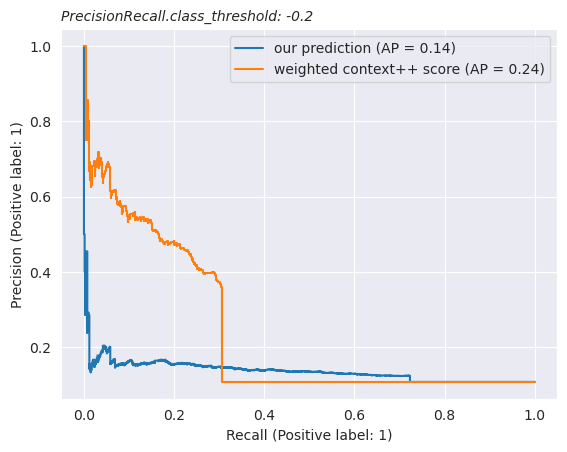

In [64]:
from sklearn.metrics import PrecisionRecallDisplay
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
displ = PrecisionRecallDisplay.from_predictions(
    bartel_on_test_set['class'], -1 * bartel_on_test_set['prediction'],
    ax=ax,
    name='our prediction',
)
PrecisionRecallDisplay.from_predictions(
    bartel_on_test_set['class'], -1 * bartel_on_test_set['weighted context++ score'],
    ax=ax,
    name='weighted context++ score',
)
ax.legend()
ax.set_title('PrecisionRecall.class_threshold: {}'.format(CLASS_THRESHOLD), loc='left', fontstyle='oblique', fontsize='medium')

output_path = "{}/PrecisionRecall.class_threshold_{}.jpg".format(
    RESULT_DIR,
    CLASS_THRESHOLD
)
fig.savefig(output_path)
plt.show()


In [65]:
# from Bio import SeqIO

# file_path = 'data/GCF_000001405.40/rna.fna'

# for record in SeqIO.parse(file_path, "fasta"):
#     description = record.description.split()
#     gene_id = next((item.split('=')[1] for item in description if item.startswith('gene=')), None)
    
#     # symbol = extract_gene_symbol(record)
#     # Do not need the locus tag (== record.id) for now
#     # gene_symbol_to_seq[symbol] = [record.seq, record.id]
#     # gene_symbol_to_seq[symbol] = record.seq   
    
#     break

In [66]:
# print(record.seq)

In [115]:
# print(method_predictions_test.size)
example_signal = method_predictions_test[method_predictions_test.fold_change == 0].loc[11].signal

In [116]:
is_padding = [isinstance(x, int) for x in example_signal]

In [117]:
example_signal_no_padding = example_signal[:is_padding.index(True)]

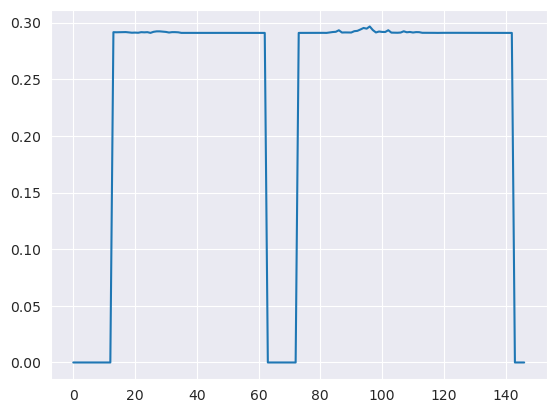

In [118]:
plt.plot(example_signal_no_padding)

In [ ]:
method_predictions_test[method_predictions_test.fold_change == 0]

In [132]:
predictions = method_predictions_test.copy()

In [140]:
from statistics import median

predictions.signal = predictions.signal.map(lambda x: [i for i in x if i > 0])
predictions['signal_median'] = predictions.signal.map(lambda x: median(x) if len(x) else None)

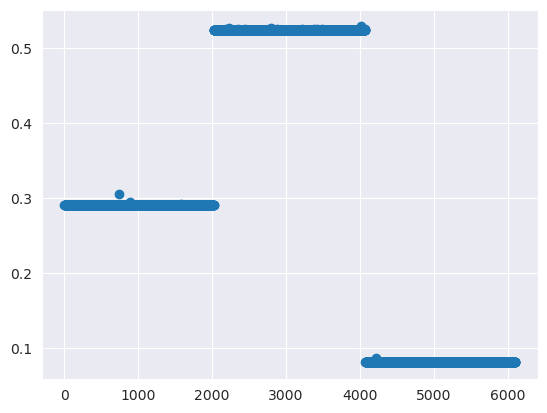

In [146]:
# print(predictions.signal_median)
plt.scatter(predictions.signal_median.index, predictions.signal_median.values)

In [25]:
import pandas as pd

raw_signal_df = pd.read_pickle("data/mirna_fcs.hsa-miR-16-5p.test.positive_fc_to_zero.signals.compressed_zeros.predict_genes_without_signal.zero_signal_to_negative.pkl")
# raw_signal_df[raw_signal_df.fold_change == 0]

In [21]:
from statistics import median

from utils import check_empty_or_not_array

raw_signal_df.signal = raw_signal_df.signal.map(lambda x: [i for i in x if (i > 0)] if not check_empty_or_not_array(x) else None)
raw_signal_df['signal_median'] = raw_signal_df.signal.map(lambda x: median(x) if not check_empty_or_not_array(x) else None)

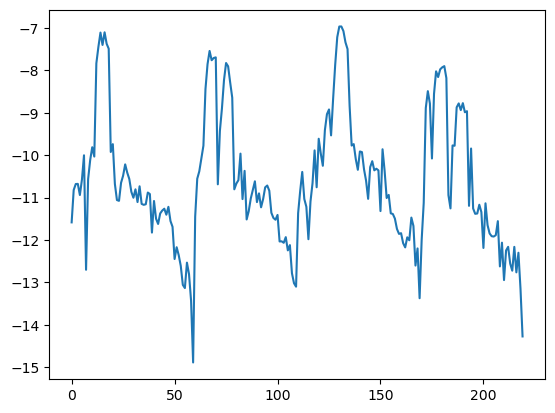

In [24]:
from math import log
import matplotlib.pyplot as plt

plt.plot([log(x) for x in raw_signal_df.loc[2026].signal])
# plt.ylim((-0.0001,0.001))


(-0.0001, 0.001)

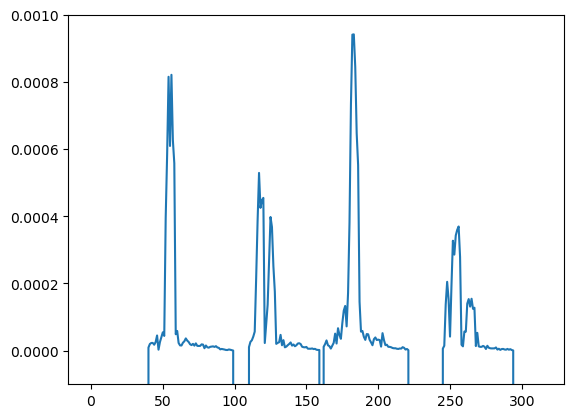

In [27]:
plt.plot([x for x in raw_signal_df.loc[2026].signal])
plt.ylim((-0.0001,0.001))
 

In [82]:
# from data_manipulation import get_normalize_function
from statistics import mean, stdev

# def get_standardize_function(signal_mean, signal_std, signal_min):
#     def _standardize_function(input_array):
#         if check_empty_or_not_array(input_array):
#             return input_array
#         return [(x - signal_mean) if x != -0.1 else signal_min for x in input_array]
        # return [(x - signal_mean)/(signal_std) if x != -0.1 else signal_min for x in input_array]
    
    # return _standardize_function

def get_normalize_function(min_val, max_val):
    def normalize(input_array):
        if check_empty_or_not_array(input_array):
            return input_array
        return [((log(x) - min_val) / (max_val - min_val)) if (x > 0) else 0.1 for x in input_array]
    return normalize

def normalize_column_based_on_train_set(
    input_file_path_train,
    input_file_path_test,
    column,
    output_path_suffix,
):
    df_train = pd.read_pickle(input_file_path_train)
    df_test = pd.read_pickle(input_file_path_test)
    
    signal_explode = df_train[column].explode()
    raw_signal_min = min([x for x in signal_explode if (x > 0)])
    signal_explode = [log(x) if (x > 0) else log(raw_signal_min) for x in signal_explode]
    
    # return signal_explode, signal_max
    # signal_mean = mean(signal_explode)
#     signal_std = stdev(signal_explode)
    log_signal_min = min(signal_explode)
    log_signal_max = max(signal_explode)

    df_train[column] = df_train[column].apply(
        func=get_normalize_function(log_signal_min, log_signal_max)
    )
    df_test[column] = df_test[column].apply(
        func=get_normalize_function(log_signal_min, log_signal_max)
    ) 
    
    output_file_path_train = extend_path_by_suffix_before_filetype(
        path = input_file_path_train,
        suffix = output_path_suffix,
    )
    output_file_path_test = extend_path_by_suffix_before_filetype(
        path = input_file_path_test,
        suffix = output_path_suffix,
    )

    make_dir_with_parents(output_file_path_train)
    df_train.to_pickle(output_file_path_train)
    make_dir_with_parents(output_file_path_test)
    df_test.to_pickle(output_file_path_test)
    
    return output_file_path_train, output_file_path_test

DATASET_NAME = 'mirna_fcs'
# MIRNA_NAME = 'hsa-miR-106b-5p'
# MIRNA_NAME = 'hsa-let-7c-5p'
MIRNA_NAME = 'hsa-miR-16-5p'

# input_file_path_train = 'data/{}.{}.train.positive_fc_to_zero.signals.compressed_zeros.remove_genes_without_signal.zero_signal_to_negative.pkl'.format(DATASET_NAME, MIRNA_NAME)
# df_train = pd.read_pickle(input_file_path_train)
# df_train.signal.map(lambda x: x if x != -0.1 else )
std_train, std_test = normalize_column_based_on_train_set(
    input_file_path_train = 'data/{}.{}.train.positive_fc_to_zero.signals.compressed_zeros.remove_genes_without_signal.zero_signal_to_negative.pkl'.format(DATASET_NAME, MIRNA_NAME),
    input_file_path_test = 'data/{}.{}.test.positive_fc_to_zero.signals.compressed_zeros.predict_genes_without_signal.zero_signal_to_negative.pkl'.format(DATASET_NAME, MIRNA_NAME),
    column = 'signal',
    output_path_suffix = ".normalize",
)

NameError: name 'log' is not defined

In [ ]:
for i in range(0,20):
    plt.plot(std_train.iloc[i].signal)
    plt.ylim((0,1))
    plt.show()
    print(max(std_train.iloc[i].signal))

TypeError: unhashable type: 'numpy.ndarray'

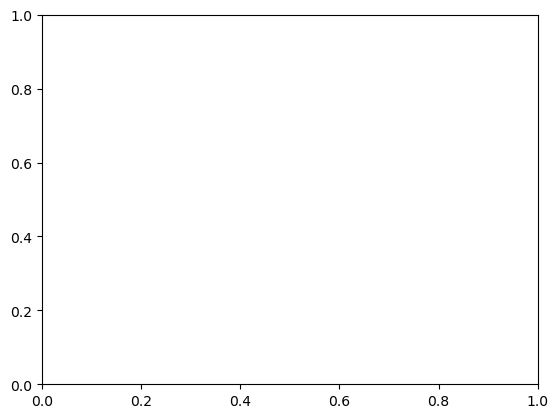

In [154]:
plt.plot(log_signal[:500])

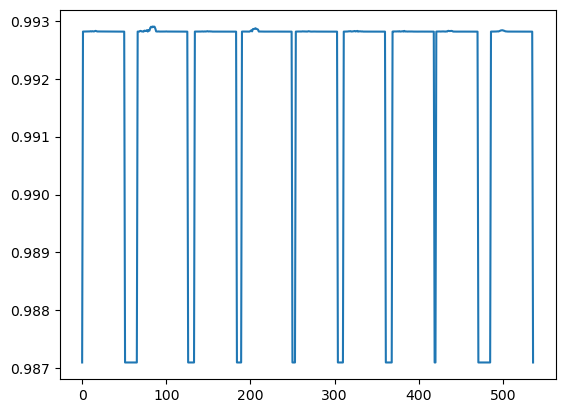

In [85]:
plt.plot(std_train.iloc[10].signal)

In [49]:
tmp_train.iloc[3].signal

[0.9870980112281228,
 0.9928172008317304,
 0.9928177745219179,
 0.992821441346316,
 0.9928187334817212,
 0.99281913533236,
 0.9928635302571988,
 0.9928480583174875,
 0.9928838616602714,
 0.9928942875656543,
 0.9928377639362835,
 0.992871424579531,
 0.9928175163764107,
 0.9928297731193608,
 0.9928253251267075,
 0.9928213441571412,
 0.9928192039542117,
 0.9928243371103156,
 0.9928425740697502,
 0.992822191031349,
 0.9928159106489528,
 0.9928174545155741,
 0.9928266613588806,
 0.9928299094016448,
 0.9928162924074301,
 0.9928334438635201,
 0.9928219098303309,
 0.99281482060606,
 0.9928171474468694,
 0.9928217176335246,
 0.9928161245702231,
 0.9928163616728078,
 0.9928163132948631,
 0.9928171024367451,
 0.9928169919622852,
 0.9928183082079653,
 0.99281486998361,
 0.9928161714195787,
 0.9928150167078887,
 0.992814817492217,
 0.9928155768497056,
 0.9928165327837374,
 0.9928159794116332,
 0.9928146700238408,
 0.9928163770124679,
 0.992817870527887,
 0.9928168268951716,
 0.992815552038517,
 0.9

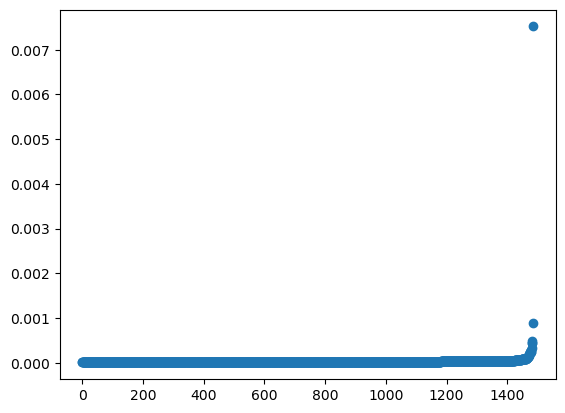

In [23]:
import matplotlib.pyplot as plt

plt.scatter(raw_signal_df.signal_median.index, raw_signal_df.signal_median.sort_values().values)

In [7]:
df_train.signal = df_train.signal.map(lambda x: [i for i in x if i > 0])
df_train['signal_median'] = df_train.signal.map(lambda x: median(x) if len(x) else None)

NameError: name 'df_train' is not defined

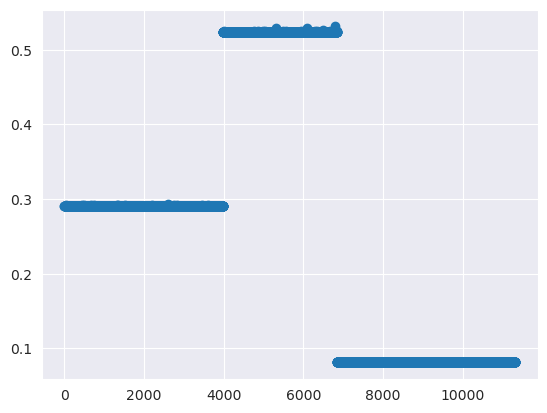

In [162]:
plt.scatter(df_train.signal_median.index, df_train.signal_median.values)

In [184]:
MIRNA_NAME = 'hsa-miR-16-5p'
DATASET_NAME = 'mirna_fcs'
input_file_path_train = 'data/{}.{}.train.positive_fc_to_zero.signals.compressed_zeros.remove_genes_without_signal.zero_signal_to_negative.pkl'.format(DATASET_NAME, MIRNA_NAME)
input_file_path_test = 'data/{}.{}.test.positive_fc_to_zero.signals.compressed_zeros.predict_genes_without_signal.zero_signal_to_negative.pkl'.format(DATASET_NAME, MIRNA_NAME)
column = 'signal'

df_train = pd.read_pickle(input_file_path_train)
df_test = pd.read_pickle(input_file_path_test)


In [189]:
 df_train[column]

1       [-0.1, 6.495675685383925e-05, 5.82483951889333...
2       [-0.1, -0.1, -0.1, -0.1, -0.1, -0.1, 2.0137641...
3       [-0.1, -0.1, -0.1, 2.3997928947210314e-05, 3.9...
5       [-0.1, 4.949656149913227e-05, 5.95324963796883...
7       [-0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0....
                              ...                        
6076    [-0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0....
6077    [-0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0....
6078    [-0.1, -0.1, -0.1, 1.3743217568844556e-05, 2.1...
6079    [-0.1, -0.1, -0.1, -0.1, 9.991182014346123e-06...
6080    [-0.1, -0.1, -0.1, -0.1, -0.1, 5.7040964020416...
Name: signal, Length: 4479, dtype: object

(array([1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        3.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00,
        3.0000e+00, 4.0000e+00, 1.5000e+01, 3.6000e+01, 1.1400e+02,
        3.0400e+02, 6.5100e+02, 9.8000e+02, 1.4120e+03, 1.8230e+03,
        2.3180e+03, 2.7030e+03, 3.4080e+03, 4.3080e+03, 5.7200e+03,
        8.3170e+03, 1.1918e+04, 1.6861e+04, 2.2192e+04, 2.7110e+04,
        3.1263e+04, 3.3876e+04, 3.5467e+04, 3.6800e+04, 3.7485e+04,
        3.7817e+04, 3.6932e+04, 3.7256e+04, 3.7113e+04, 3.6882e+04,
        3.4773e+04, 3.1719e+04, 2.7761e+04, 2.4216e+04, 2.0925e+04,
        1.8397e+04, 1.6663e+04, 1.4707e+04, 1.3807e+04, 1.2900e+04,
        1.2605e+04, 1.2520e+04, 1.2298e+04, 1.1955e+04, 1.1245e+04,
        1.0010e+04, 9.0160e+03, 8.1110e+03, 7.4620e+03, 7.0680e+03,
        5.7560e+03, 4.5800e+03, 3.5410e+03, 2.4850e+03, 1.5600e+03,
        8.7700e+02, 4.6600e+02, 3.7700e+02, 2.3200e+02, 2.2800e+02,
        1.6000e+02, 1.1900e+02, 1.1500e+02, 8.70

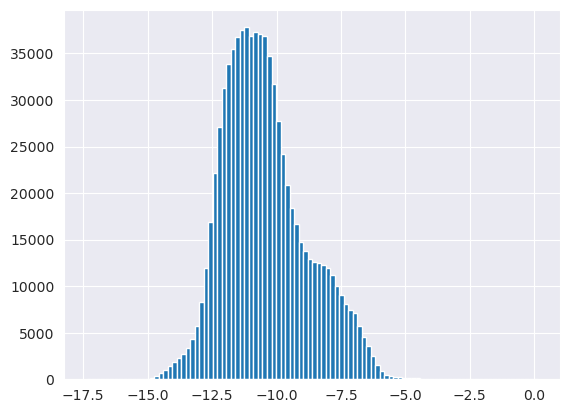

In [228]:
import numpy as np 
from math import log

a = df_train[column].explode()
# a[a > 0.01].hist(bins=100)
# plt.hist(np.log(a[a > 0.01]))
plt.hist([log(x) for x in a[a > 0.00]], bins=100)

In [233]:
a[a > 0.00].values

array([6.495675685383925e-05, 5.8248395188933324e-05,
       4.9159174438479335e-05, ..., 7.214852375909686e-06,
       1.847485254984349e-06, 1.9140866061206907e-06], dtype=object)

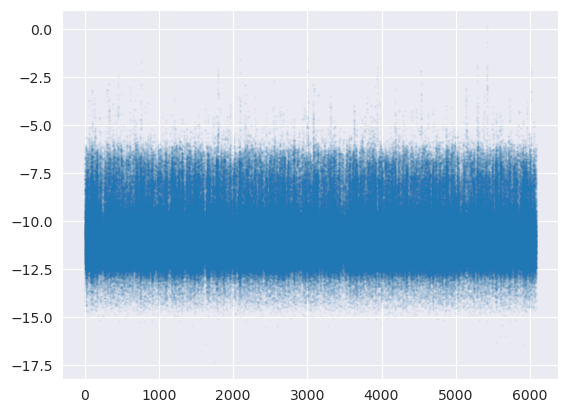

In [239]:
# plt.scatter(a[a > 0.00].index, [ log(x) for x in a[a > 0.00].values])
plt.scatter(a[a > 0.00].index, [ log(x) for x in a[a > 0.00].values], alpha=0.1, s=0.1)

In [203]:
(df_train[column].explode() > 0.5).sum()

3

In [266]:
signal_max = df_train[column].explode().max()
signal_min = df_train[column].explode().min()
signal_max, signal_min

(1.0, 0.0)

In [240]:
def get_normalize_function(min_val, max_val):
    def normalize(input_array):
        if check_empty_or_not_array(input_array):
            return input_array
        return [((x - min_val) / (max_val - min_val)) for x in input_array]
    return normalize

In [241]:
df_train[column] = df_train[column].apply(
    func=get_normalize_function(signal_min, signal_max)
)


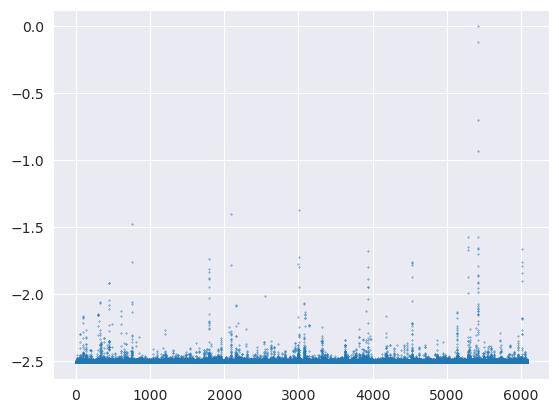

In [254]:
a = df_train[column].explode()
# plt.hist([(x) for x in a[a > 0.00]], bins=100)
plt.scatter(a[a > 0.00].index, [ log(x) for x in a[a > 0.00].values], alpha=1, s=0.1)

In [251]:
df_test[column] = df_test[column].apply(
    func=get_normalize_function(signal_min, signal_max)
)

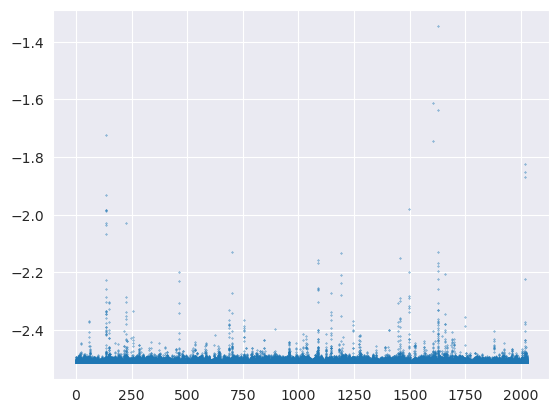

In [255]:
a = df_test[column].explode()
plt.scatter(a[a > 0.00].index, [ log(x) for x in a[a > 0.00].values], alpha=1, s=0.1)

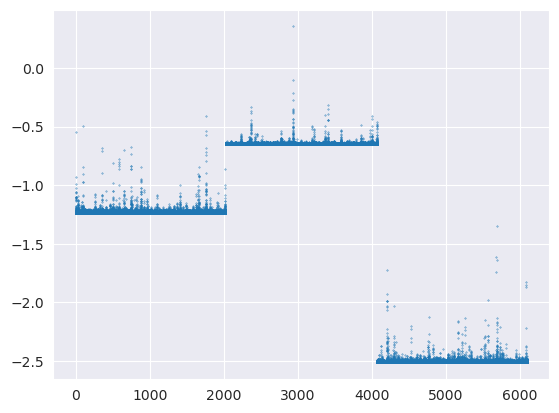

In [264]:
b = predictions.signal.explode()
plt.scatter(b[b > 0.00].index, [ log(x) for x in b[b > 0.00].values], alpha=1, s=0.1)

In [257]:
# plt.hist([(x) for x in a[a > 0.00]], bins=100)

In [ ]:
output_file_path_train = extend_path_by_suffix_before_filetype(
    path = input_file_path_train,
    suffix = output_path_suffix,
)
output_file_path_test = extend_path_by_suffix_before_filetype(
    path = input_file_path_test,
    suffix = output_path_suffix,
)